## Decision Tree


<a id="gather"></a>
Decision Tree is a <b> Supervised Machine learning algorithm </b> that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where <b> internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. </b> 


In a <b>Decision tree</b>, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches. It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.

<ul>
<li>In order to build a tree, we use the <b>CART (Classification and Regression Tree) algorithm,</b> which stands for <b>Classification and Regression Tree algorithm.</b> </li>
<li>A decision tree simply asks a question, and based on the answer <b> ( Yes/No )</b>, it further split the tree into subtrees. </li>
<li> Below diagram explains the general structure of a decision tree: </li>
</ul>

<ul>
<img src="https://i.imgur.com/TviJJgY.png" width="450"> <br>
</ul>

### Why use Decision Tree? 

There are various algorithms in Machine learning, so choosing the best algorithm for the given dataset and problem is the main point to remember while creating a machine learning model. Below are the two reasons for using the Decision tree:


- Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
- The logic behind the decision tree can be easily understood because it shows a tree-like structure. 

### Attribute Selection Measures 

While implementing a Decision tree, the main issue arises that how to select the best attribute for the root node and for sub-nodes. So, to solve such problems there is a technique which is called as <b>Attribute selection measure or ASM </b>. By this measurement, we can easily select the best attribute for the nodes of the tree. There are two popular techniques for ASM, which are:


- <b> Entropy </b>
- <b>Information Gain.</b> 
- <b> Gini Index </b>

<h3> <b> Entropy: </b> </h3>

Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. Entropy can be calculated as:
 $$H_{D} = -\sum \limits _{j} P_{j}\log_2p_j $$ 
Where, $P_{j}$ is the probability that an arbitrary tuple in Dataset belongs to class $c_{j}$.

<h3> <b> Gini Index: </b> </h3>

Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.An attribute with the low Gini index should be preferred as compared to the high Gini index.Gini index can be calculated using the below formula:
$$ Gini = 1 - \sum \limits _{j} P_j^2 $$
</ul>


<ul>
<img src="https://i.imgur.com/H4xvXQy.png" width="500"> <br>
</ul>

    
<h3> <b> Information Gain </b></h3>

Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute. It calculates how much information a feature provides us about a class.It can be calculated using the below formula:
$$IG(D) = H_D - \sum \limits _{j}\dfrac{\mid D_{j} \mid}{\mid D \mid} {*} H_{D_{j}}$$


### Resources
- Video: [Learning Paradigms](https://www.youtube.com/watch?v=7VeUPuFGJHk&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=38&pbjreload=101) (17 minutes)

<h3> Working procedure </h3>
    
Using a decision algorithm, we start at the tree root and split the data on the feature that results in the largest <b>information gain (IG)</b>.We repeat this splitting procedure at each child node down to the empty leaves. This means that the samples at each node all belong to the same class.


<h3> Advantages of the Decision Tree </h3>

<ul>    
<li> It is simple to understand as it follows the same process which a human follow while making any decision in real-life.</li>
<li> It can be very useful for solving decision-related problems.</li>
<li> It helps to think about all the possible outcomes for a problem.</li>
<li> here is less requirement of data cleaning compared to other algorithms.</li>
</ul>    
    
<h3>Disadvantages of the Decision Tree</h3>
<ul>
<li> The decision tree contains lots of layers, which makes it complex.</li>
<li> It may have an overfitting issue, which can be resolved using the <b>Random Forest algorithm</b>.</li>
<li> There is less requirement of data cleaning compared to other algorithms.</li>

### Load Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

### Data Acquisiton

In [2]:
data = pd.read_csv("./iris.csv")

In [3]:
# Showing overview of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Printing Dimension of datasets
print("Dimension of dataset:", data.shape)

Dimension of dataset: (150, 5)


In [5]:
# Showing datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# getting discriptive statistcs 
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Preprocessing

In [7]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# Extracting dataframe for only 'Object' datatypes
data_ct = data.select_dtypes(include='object')
data_ct.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
# Extracting dataframe for only 'number' datatypes
data_num = data.select_dtypes(include=['float64','int64'])
data_num.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
data.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

Text(0.5, 1.0, 'Species distribution')

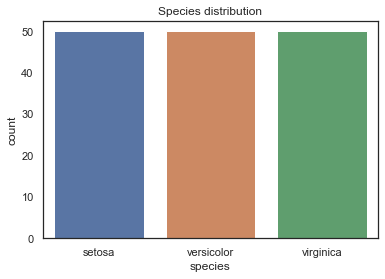

In [11]:
#Count plot for Species
sns.countplot('species',data = data)
plt.title("Species distribution")

###### Converting the species labels into numeric



In [12]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['species']= label_encoder.fit_transform(data['species']) 

In [13]:
#Check unique value of species
data['species'].unique()

array([0, 1, 2])

In [14]:
# Showing overview of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
#Constructing correlation Matrix
corr = data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


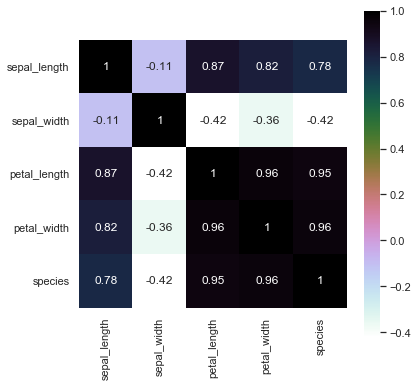

In [16]:
#heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [17]:
# Absolute correlation value with species(Target variable)

abs(corr['species'])[:-1].sort_values(ascending = False)

petal_width     0.956464
petal_length    0.949043
sepal_length    0.782561
sepal_width     0.419446
Name: species, dtype: float64

In [18]:
# Splitting Data set into train and validation

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.30)

In [19]:
#considering only highly correlated features for training and validation
train_x = train.drop(['species'], axis = 1)
train_y = train['species']             

test_x = test.drop(['species'],axis = 1)
test_y = test['species'] 

In [20]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (105, 4)
Dimension of train_y : (105,)
Dimension of test_x : (45, 4)
Dimension of test_y : (45,)


<h3> Python Implementation of Decision Tree Classifier </h3>

In [21]:
#Using Decision Tree Classifier for model building by "gini"

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=3,criterion="gini")
clf.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [22]:
# Predict Species for test data
pred = clf.predict(test_x)
pred

array([1, 2, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0,
       1])

In [23]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the Decision Tree is 93.33%


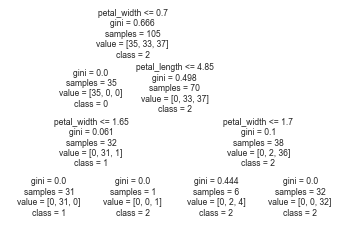

In [24]:
#Model Visualization
from sklearn import tree

tree.plot_tree(clf,feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
               class_names= ['0', '1', '2'],proportion = False)
plt.show()

In [25]:
#Model visualization
from sklearn.tree.export import export_text
r = export_text(clf, feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(r)

|--- petal_width <= 0.70
|   |--- class: 0
|--- petal_width >  0.70
|   |--- petal_length <= 4.85
|   |   |--- petal_width <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal_width >  1.65
|   |   |   |--- class: 2
|   |--- petal_length >  4.85
|   |   |--- petal_width <= 1.70
|   |   |   |--- class: 2
|   |   |--- petal_width >  1.70
|   |   |   |--- class: 2



In [26]:
#Using Decision Tree Classifier for model building by "entropy"

from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=0,max_depth=3,criterion="entropy")
clf1.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [27]:
# Predict Species for test data
pred1 = clf1.predict(test_x)
pred1

array([1, 2, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0,
       1])

In [28]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred1,test_y)*100,2)))

The accuracy of the Decision Tree is 93.33%


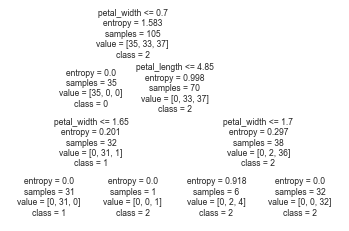

In [29]:
##Model visualization
from sklearn import tree

tree.plot_tree(clf1,feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
               class_names= ['0', '1', '2'],proportion = False)
plt.show()

In [30]:
#Model visualization
from sklearn.tree.export import export_text
r = export_text(clf1, feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(r)

|--- petal_width <= 0.70
|   |--- class: 0
|--- petal_width >  0.70
|   |--- petal_length <= 4.85
|   |   |--- petal_width <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal_width >  1.65
|   |   |   |--- class: 2
|   |--- petal_length >  4.85
|   |   |--- petal_width <= 1.70
|   |   |   |--- class: 2
|   |   |--- petal_width >  1.70
|   |   |   |--- class: 2

